# Machine Learning with Deep Learning  1-Classification, 2- Regression, 3- Clustering

1- Classification

In [1]:
!pip install tensorflow

  Using cached flatbuffers-22.9.24-py2.py3-none-any.whl (26 kB)


In [2]:
import pandas as pd
import tensorflow as tf

In [22]:
from tensorflow.keras.models import Sequential #Siraya koymamizi sagliyacak
from tensorflow.keras.layers import Dense 

In [6]:
df=pd.read_csv('pima-indians-diabetes.csv')

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.isnull().sum() #Veride boslugumuz yok

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
df.shape #768 kadinin verisi var, 9 tane veri basligimiz var

(768, 9)

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [17]:
x=df.iloc[:,0:8]
y=df.iloc[:,8]

In [37]:
model=Sequential()
model.add(Dense(8,activation='relu')) # 8 tane sutun verimiz oldugu icin 8 ile basliyoruz.
model.add(Dense(16,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid')) #final karar eger evet hayir ise= sigmoid
model.compile(loss="binary_crossentropy",optimizer="adam",metrics="accuracy") #adam= ogrenme hizi dusukse yukseltiyor

In [38]:
model.fit(x,y, epochs=500, batch_size=10, verbose=1) #Accuracy 90 with epochs=500

Epoch 1/500
77/77 [==============================] - 1s 1ms/step - loss: 0.9187 - accuracy: 0.4987
Epoch 2/500
77/77 [==============================] - 0s 1ms/step - loss: 0.6367 - accuracy: 0.6628
Epoch 3/500
77/77 [==============================] - 0s 1ms/step - loss: 0.6151 - accuracy: 0.6667
Epoch 4/500
77/77 [==============================] - 0s 1ms/step - loss: 0.6163 - accuracy: 0.6732
Epoch 5/500
77/77 [==============================] - 0s 1ms/step - loss: 0.6066 - accuracy: 0.6706
Epoch 6/500
77/77 [==============================] - 0s 1ms/step - loss: 0.5994 - accuracy: 0.6641
Epoch 7/500
77/77 [==============================] - 0s 1ms/step - loss: 0.5991 - accuracy: 0.6797
Epoch 8/500
77/77 [==============================] - 0s 975us/step - loss: 0.5981 - accuracy: 0.6810
Epoch 9/500
77/77 [==============================] - 0s 996us/step - loss: 0.5968 - accuracy: 0.6823
Epoch 10/500
77/77 [==============================] - 0s 961us/step - loss: 0.5936 - accuracy: 0.6758
Epo

In [40]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 8)                 72        
                                                                 
 dense_31 (Dense)            (None, 16)                144       
                                                                 
 dense_32 (Dense)            (None, 32)                544       
                                                                 
 dense_33 (Dense)            (None, 16)                528       
                                                                 
 dense_34 (Dense)            (None, 4)                 68        
                                                                 
 dense_35 (Dense)            (None, 1)                 5         
                                                                 
Total params: 1,361
Trainable params: 1,361
Non-traina

In [41]:
scores = model.evaluate(x,y)

24/24 [==============================] - 0s 867us/step - loss: 0.1970 - accuracy: 0.9206


In [42]:
scores[0] #loss:

0.19702468812465668

In [44]:
scores[1] #accuracy_score

0.9205729365348816

In [45]:
#Early stopping - 150 de durmasi gerekirse  

In [50]:
history=model.fit(x,y, epochs=500,validation_split=0.20, batch_size=10, verbose=1) #Accuracy 90 with epochs=500

Epoch 1/500
62/62 [==============================] - 0s 4ms/step - loss: 0.1313 - accuracy: 0.9528 - val_loss: 0.1325 - val_accuracy: 0.9481
Epoch 2/500
62/62 [==============================] - 0s 2ms/step - loss: 0.2072 - accuracy: 0.9088 - val_loss: 0.2552 - val_accuracy: 0.9156
Epoch 3/500
62/62 [==============================] - 0s 2ms/step - loss: 0.2341 - accuracy: 0.9007 - val_loss: 0.1738 - val_accuracy: 0.9091
Epoch 4/500
62/62 [==============================] - 0s 2ms/step - loss: 0.1758 - accuracy: 0.9218 - val_loss: 0.1719 - val_accuracy: 0.9351
Epoch 5/500
62/62 [==============================] - 0s 2ms/step - loss: 0.1410 - accuracy: 0.9430 - val_loss: 0.1561 - val_accuracy: 0.9610
Epoch 6/500
62/62 [==============================] - 0s 2ms/step - loss: 0.1245 - accuracy: 0.9479 - val_loss: 0.1175 - val_accuracy: 0.9740
Epoch 7/500
62/62 [==============================] - 0s 2ms/step - loss: 0.1372 - accuracy: 0.9397 - val_loss: 0.1486 - val_accuracy: 0.9675
Epoch 8/500
6

In [47]:
import matplotlib.pyplot as plt

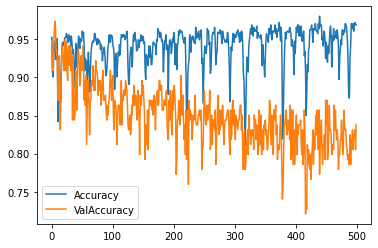

In [52]:
plt.plot(history.history["accuracy"],label="Accuracy")
plt.plot(history.history["val_accuracy"],label="ValAccuracy")
plt.legend()
         

2-Regression

In [57]:
import pandas as pd

In [58]:
df=pd.read_pickle('kc_house.pkl')

In [90]:
df.to_csv("kc_data.csv")

In [59]:
df.head()

,bedrooms,bathrooms,sqft_living,grade,view,basement,waterfront,floors,age,renovated,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,9,1.0000,1180,7,0,0,0,1.0,65,0,...,0,0,0,0,0,0,1,0,0,0
1,9,5.0625,2570,7,0,1,0,2.0,69,1,...,0,0,0,0,0,0,0,0,0,0
2,4,1.0000,770,6,0,0,0,1.0,87,0,...,0,0,0,0,0,0,0,0,0,0
3,16,9.0000,1960,7,0,1,0,1.0,55,0,...,0,0,0,0,0,0,0,0,0,0
4,9,4.0000,1680,8,0,0,0,1.0,33,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
x= df.loc[:, df.columns != "price"]
#x=df.drop("price",axis=1)

In [66]:
y= df['price']

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [79]:
from sklearn.model_selection import train_test_split

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [91]:
model=Sequential()
model.add(Dense(81,activation='relu')) #sutun sayisi ilk
model.add(Dense(162,activation='relu'))
model.add(Dense(324,activation='relu'))
model.add(Dense(648,activation='relu'))
model.add(Dense(324,activation='relu'))
model.add(Dense(162,activation='relu'))
model.add(Dense(81,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(1))
model.compile(optimizer="Adam",loss="mse")

In [93]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=128,epochs=800)
model.summary()

Epoch 1/800
119/119 [==============================] - 1s 6ms/step - loss: 8615800832.0000 - val_loss: 10555101184.0000
Epoch 2/800
119/119 [==============================] - 1s 6ms/step - loss: 8841509888.0000 - val_loss: 8522972672.0000
Epoch 3/800
119/119 [==============================] - 1s 5ms/step - loss: 8529003520.0000 - val_loss: 8683358208.0000
Epoch 4/800
119/119 [==============================] - 1s 6ms/step - loss: 8633269248.0000 - val_loss: 10850232320.0000
Epoch 5/800
119/119 [==============================] - 1s 5ms/step - loss: 8318365696.0000 - val_loss: 9202260992.0000
Epoch 6/800
119/119 [==============================] - 1s 5ms/step - loss: 8371302912.0000 - val_loss: 8962380800.0000
Epoch 7/800
119/119 [==============================] - 1s 5ms/step - loss: 8470893568.0000 - val_loss: 9016803328.0000
Epoch 8/800
119/119 [==============================] - 1s 5ms/step - loss: 8965545984.0000 - val_loss: 8644051968.0000
Epoch 9/800
119/119 [=========================

In [94]:
loss_df=pd.DataFrame(model.history.history)

<AxesSubplot:>

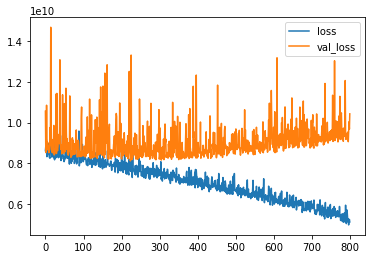

In [95]:
loss_df.plot()

In [96]:
tahmin=model.predict(x)

595/595 [==============================] - 1s 2ms/step


In [97]:
from sklearn.metrics import mean_squared_error, r2_score

In [98]:
r2_score(tahmin,y)

0.8109596411446791

In [99]:
(mean_squared_error(tahmin,y))**2

4.956189351341689e+19